In [2]:
#########################################
## Example of simple linear regression ##
#########################################

In [1]:
################################
## Import required Librarires ##
################################
# Numpy to compute #
import numpy as np

# Matplotlib to show the results ##
import matplotlib.pyplot as plt
import pandas as pd

# Scikit learn to make the regression model #
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
####################################
## Read the dataset (Format .csv) ##
####################################
df = pd.read_csv("datasets/Productos.csv", decimal=",")
df.head(10)

,Semana,Horas Trabajadas,Horas Descanso,Productos Terminados
0,1,42,2,28.9
1,2,45,3,30.6
2,3,30,2,21.1
3,4,33,2,21.8
4,5,33,3,19.3
5,6,37,3,26.3
6,7,39,2,28.1
7,8,49,2,28.4
8,9,48,2,29.4
9,10,34,2,21.1


In [29]:
##########################
## Datset Preprocessing ##
##########################
df = df.dropna(subset=['Semana','Horas Trabajadas','Horas Descanso', 'Productos Terminados'])

In [30]:
print(df.head(10))

   Semana  Horas Trabajadas  Horas Descanso  Productos Terminados
0       1                42               2                  28.9
1       2                45               3                  30.6
2       3                30               2                  21.1
3       4                33               2                  21.8
4       5                33               3                  19.3
5       6                37               3                  26.3
6       7                39               2                  28.1
7       8                49               2                  28.4
8       9                48               2                  29.4
9      10                34               2                  21.1


In [6]:
## Print different sections of the dataframe ##
print(df['horas'].head(10))

0     40.90547645
1     41.57648349
2     41.36923875
3     41.53721065
4     40.44120331
5     41.14248397
6      40.6538416
7     41.10474124
9     41.99282312
10    40.81829105
Name: horas, dtype: object


In [33]:
############################
## Selection of variables ##
############################
method = 0

if method == 1:
    # Method 1 (Using names of columns)#
    variable_x = "Horas Trabajadas"
    variable_y = "Productos Terminados"
else:
    # Method 2 (Using data from columns)#
    x = df["Horas Trabajadas"].astype(float)
    y = df["Productos Terminados"].astype(float)
    
    x = [[i] for i in x]
    y = [[i] for i in y]


In [34]:
##################################
## Generate and train the model ##
##################################
model = LinearRegression() 

if method == 1:
    # Method 1 #
    model.fit(df[[variable_x]], df[variable_y]) 
else:
    # Method 2 #
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    model.fit(x_train, y_train)    

In [35]:
##############################################
## Make predictions using the trained model ##
##############################################
y_pred = model.predict(x_test)
print(y_pred[0:10])

[[23.25178257]
 [24.67834704]
 [21.82521811]
 [28.95804043]
 [22.77626108]
 [20.39865365]
 [27.53147596]
 [22.77626108]
 [29.43356191]
 [24.20282555]]


In [25]:
####################
## Test the model ##
####################
mse = mean_squared_error(y_test, y_pred)
print(mse)

2.4622809535379213


In [36]:
############################################
## Show parameters calculted by the model ##
############################################
print(f"Coeficiente m: {model.coef_[0][0]}")
print(f"Intercepto b: {model.intercept_[0]}")

print (f"Ecuación de la recta: y = {model.coef_[0][0]}x + {model.intercept_[0]}") 

print(f"Error cuadrático medio (MSE): {mse}")

Coeficiente m: 0.4755214878110078
Intercepto b: 6.133009011596595
Ecuación de la recta: y = 0.4755214878110078x + 6.133009011596595
Error cuadrático medio (MSE): 2.4622809535379213


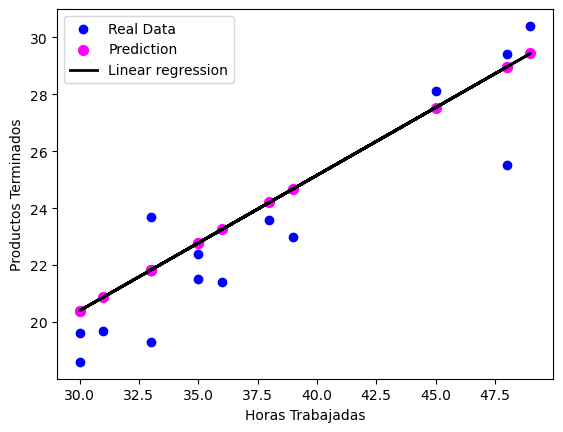

In [37]:
################################
# Show the prediction results ##
################################
# Plot real data #
plt.scatter(x_test, y_test, color="blue", label="Real Data")
# Plot the linear regression #
plt.scatter(x_test, y_pred, color="magenta", linewidth=2, label="Prediction")
# Plot predictions obtained by the model #
plt.plot(x_test, y_pred, color="black", linewidth=2, label="Linear regression")

# Plot axis labels 
plt.xlabel("Horas Trabajadas")
plt.ylabel("Productos Terminados")
plt.legend()
plt.show()

In [ ]:
##############################################
## Prediction of values using specific data ##
# ############################################
list = [20, 38, 42, 55, 80, 14]

for i in list:
    value = i*model.coef_[0][0] + model.intercept_[0]
    print(f"Para un total de {i} horas trabajadas, el valor predecido es:{value}")

Para un total de 20 trabajadas, el valor predecido es:15.64343876781675
Para un total de 38 trabajadas, el valor predecido es:24.20282554841489
Para un total de 42 trabajadas, el valor predecido es:26.10491149965892
Para un total de 55 trabajadas, el valor predecido es:32.286690841202024
Para un total de 80 trabajadas, el valor predecido es:44.17472803647722
Para un total de 14 trabajadas, el valor predecido es:12.790309840950705
